In [255]:
# https://www.youtube.com/watch?v=gSYiKKoREFI
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import seaborn as sns
import tensorflow as tf

In [256]:
org_list = []

for i in range(15):
    temp_df = pd.read_csv(f"E:\Data_warehouse\contest_data/org_{i+1}.csv")
    columns = [('org_{}'.format(i + 1), col) for col in temp_df.columns]
    temp_df.columns = pd.MultiIndex.from_tuples(columns)
    org_list.append(temp_df)

df = pd.concat(org_list, axis=1)
df.head()

org_1                                                       org_2  \
       Open      High       Low     Close Adj Close    Volume      Open   
0  0.027880  0.025988  0.033659  0.024765  0.021545  0.245573  0.266589   
1  0.020443  0.018876  0.021268  0.014612  0.016912  0.307382  0.261084   
2  0.019211  0.016421  0.019683  0.022698  0.013176  0.281341  0.265616   
3  0.023440  0.021740  0.022906  0.015337  0.020541  0.241052  0.248438   
4  0.020253  0.008166  0.021183  0.022217  0.020330  0.221884  0.248909   

                                 ...    org_14                                \
       High       Low     Close  ...       Low     Close Adj Close    Volume   
0  0.263898  0.264672  0.268466  ...  0.020003  0.025331  0.011525  0.058401   
1  0.259461  0.265566  0.263782  ...  0.017098  0.022291  0.024018  0.075992   
2  0.252503  0.262245  0.260986  ...  0.015233  0.025093  0.034806  0.039142   
3  0.241890  0.257117  0.255304  ...  0.019995  0.024737  0.015329  0.106943   
4  0.243336  0.258541  0.258958  ...  0.012984  0.011586  0.014383  0.072905   

     org_15                                                    
       Open      High       Low     Close Adj Close    Volume  
0  0.074474  0.074210  0.072215  0.073470  0.077259  0.032320  
1  0.075469  0.083429  0.078270  0.080847  0.080598  0.088032  
2  0.081649  0.092828  0.084078  0.081144  0.089813  0.053054  
3  0.080286  0.079525  0.080378  0.081369  0.074506  0.024202  
4  0.079822  0.084884  0.084061  0.087300  0.082363  0.026316  

[5 rows x 90 columns]

In [257]:
level1_columns = []

for i in df.columns:
    if i[1] == 'Close':
        level1_columns.append(i[0])

close_list = []
for i in level1_columns:
    temp = df[i]['Close']
    close_list.append(temp)

In [258]:
close_df = pd.concat(close_list, axis=1)
close_df.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
close_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.024765,0.268466,0.044988,0.076462,0.093320,0.090580,0.066961,0.164863,0.243010,0.014900,0.307956,0.059790,0.101765,0.025331,0.073470
1,0.014612,0.263782,0.049491,0.077544,0.089338,0.084212,0.054854,0.153625,0.250339,0.020742,0.309212,0.057951,0.129650,0.022291,0.080847
2,0.022698,0.260986,0.041077,0.080165,0.091000,0.085170,0.063562,0.146338,0.256932,0.023430,0.305090,0.044709,0.121993,0.025093,0.081144
3,0.015337,0.255304,0.042121,0.070439,0.080492,0.083499,0.041312,0.142313,0.246807,0.014417,0.312493,0.046948,0.107410,0.024737,0.081369
4,0.022217,0.258958,0.047204,0.082915,0.079745,0.086698,0.054388,0.146426,0.254971,0.028746,0.318296,0.053508,0.114772,0.011586,0.087300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,0.589238,0.482530,0.432823,0.663816,0.714548,0.768056,0.701636,0.462637,0.141198,0.846167,0.741896,0.480084,0.429267,0.464961,0.474561
2260,0.635360,0.525454,0.449543,0.725548,0.775677,0.832226,0.743948,0.473708,0.147293,0.889611,0.811480,0.524995,0.452009,0.493504,0.513696
2261,0.628982,0.515033,0.440554,0.729721,0.783930,0.843107,0.732391,0.485511,0.161403,0.910775,0.824090,0.526767,0.477897,0.521021,0.544717
2262,0.632841,0.524988,0.450117,0.740068,0.771690,0.833454,0.750236,0.493641,0.152784,0.903643,0.814073,0.535348,0.462789,0.502720,0.571648


In [259]:
df

org_1                                                       org_2  \
          Open      High       Low     Close Adj Close    Volume      Open   
0     0.027880  0.025988  0.033659  0.024765  0.021545  0.245573  0.266589   
1     0.020443  0.018876  0.021268  0.014612  0.016912  0.307382  0.261084   
2     0.019211  0.016421  0.019683  0.022698  0.013176  0.281341  0.265616   
3     0.023440  0.021740  0.022906  0.015337  0.020541  0.241052  0.248438   
4     0.020253  0.008166  0.021183  0.022217  0.020330  0.221884  0.248909   
...        ...       ...       ...       ...       ...       ...       ...   
2259  0.592203  0.599706  0.593713  0.589238  0.590785  0.059078  0.468479   
2260  0.600150  0.623961  0.601129  0.635360  0.649922  0.104578  0.484973   
2261  0.639967  0.631593  0.616891  0.628982  0.641604  0.092233  0.502466   
2262  0.634116  0.636463  0.631046  0.632841  0.636786  0.068349  0.502232   
2263  0.649643  0.642988  0.641736  0.629439  0.646163  0.053392  0.517519   

                                    ...    org_14                      \
          High       Low     Close  ...       Low     Close Adj Close   
0     0.263898  0.264672  0.268466  ...  0.020003  0.025331  0.011525   
1     0.259461  0.265566  0.263782  ...  0.017098  0.022291  0.024018   
2     0.252503  0.262245  0.260986  ...  0.015233  0.025093  0.034806   
3     0.241890  0.257117  0.255304  ...  0.019995  0.024737  0.015329   
4     0.243336  0.258541  0.258958  ...  0.012984  0.011586  0.014383   
...        ...       ...       ...  ...       ...       ...       ...   
2259  0.479035  0.492191  0.482530  ...  0.464588  0.464961  0.467109   
2260  0.501977  0.475676  0.525454  ...  0.461435  0.493504  0.500290   
2261  0.503092  0.488073  0.515033  ...  0.493729  0.521021  0.499078   
2262  0.518277  0.514099  0.524988  ...  0.492538  0.502720  0.501538   
2263  0.522970  0.535062  0.538555  ...  0.490846  0.500812  0.503347   

                  org_15                                                    
        Volume      Open      High       Low     Close Adj Close    Volume  
0     0.058401  0.074474  0.074210  0.072215  0.073470  0.077259  0.032320  
1     0.075992  0.075469  0.083429  0.078270  0.080847  0.080598  0.088032  
2     0.039142  0.081649  0.092828  0.084078  0.081144  0.089813  0.053054  
3     0.106943  0.080286  0.079525  0.080378  0.081369  0.074506  0.024202  
4     0.072905  0.079822  0.084884  0.084061  0.087300  0.082363  0.026316  
...        ...       ...       ...       ...       ...       ...       ...  
2259  0.041467  0.485639  0.488924  0.478847  0.474561  0.484302  0.023218  
2260  0.079082  0.485644  0.499037  0.484912  0.513696  0.514910  0.057624  
2261  0.045343  0.504434  0.547477  0.506098  0.544717  0.545467  0.055814  
2262  0.033660  0.556122  0.582690  0.567364  0.571648  0.574008  0.078897  
2263  0.048560  0.579787  0.581830  0.535235  0.556041  0.572939  0.060347  

[2264 rows x 90 columns]

In [260]:
from keras.models import Sequential 
from keras.layers import LSTM 
from keras.layers import Dense, Dropout
import seaborn as sns

In [261]:
data = df['org_4'].values
data

array([[0.07281386, 0.0770882 , 0.08664893, 0.07646183, 0.04775244,
        0.22015476],
       [0.07512781, 0.08218668, 0.08108824, 0.0775443 , 0.04586167,
        0.24477524],
       [0.07623884, 0.07777638, 0.08569442, 0.08016452, 0.0467667 ,
        0.17900627],
       ...,
       [0.69960388, 0.71638122, 0.69679865, 0.72972072, 0.76139434,
        0.12939848],
       [0.73619865, 0.7630934 , 0.736518  , 0.74006793, 0.77628114,
        0.10418402],
       [0.7515638 , 0.74860426, 0.74392513, 0.73880992, 0.78371438,
        0.07966559]])

In [262]:
test_size_num = 10
def create_dataset_tot(dataset, time_step=1, test_size_num=test_size_num, target=0):
    train_size = int(dataset.shape[0] - test_size_num)

    data_train = dataset[0:train_size, :]
    data_test = dataset[train_size:int(data.shape[0]), target]  # : 이면 다 / 0이면 open만

    dataX, dataY = [], []
    for i in range(data_train.shape[0] - time_step + 1):
        a = dataset[i:(i+time_step)]
        dataX.append(a)
        dataY.append(dataset[i + time_step, target])

    return np.array(dataX), np.array(dataY), data_test

In [263]:
def LSTM_Model(x, y, batch_size_num):
    model = Sequential()
    model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(test_size_num, 6)))
    model.add(Dropout(0.2))
    # model.add(LSTM(32, activation='relu', return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(32, activation='relu', return_sequences=False)) # 다음 layer가 drop out이기 때문에
    model.add(Dropout(0.2))
    # model.add(LSTM(50))
    model.add(Dense(1)) # trainY.shape[1] 과 같은 output  trainY.shape[1]
    model.compile(loss='mse', optimizer='adam')

    # callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15,min_delta=0.01),
                tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True, restore_best_weights=True)]

    history = model.fit(x, y, validation_split=0.1, epochs=100, batch_size=batch_size_num, verbose=1, callbacks=callbacks) 
    
    return (model, history)

In [264]:
trainX_list = [] 
trainY_list = []
test_list = []

for i in range(data.shape[1]):
    trainX, trainY, test_data = create_dataset_tot(data, time_step=test_size_num, test_size_num=10, target=i)
    trainX_list.append(trainX)
    trainY_list.append(trainY)
    test_list.append(test_data)

In [265]:
model_list = []
history_list = []

for i in range(data.shape[1]):
    (model, history) = LSTM_Model(trainX_list[i], trainY_list[i], batch_size_num=16)
    model_list.append(model) 
    history_list.append(history)

Epoch 1/100
127/127 [==============================] - 3s 9ms/step - loss: 0.0089 - val_loss: 0.0039
Epoch 2/100
127/127 [==============================] - 1s 7ms/step - loss: 0.0028 - val_loss: 0.0053
Epoch 3/100
127/127 [==============================] - 1s 7ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 4/100
127/127 [==============================] - 1s 6ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 5/100
127/127 [==============================] - 1s 6ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 6/100
127/127 [==============================] - 1s 7ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 7/100
127/127 [==============================] - 1s 6ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 8/100
127/127 [==============================] - 1s 7ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 9/100
127/127 [==============================] - 1s 7ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 10/100
127/127 [==============================] - 1s 6ms/step - loss: 0.0012 - val_lo

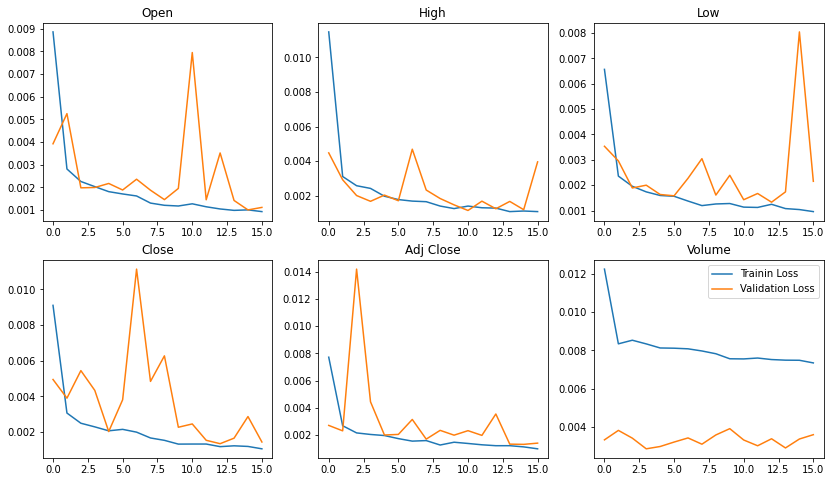

In [266]:
plt.figure(figsize=(14,8))
for i in range(data.shape[1]):
    plt.subplot(2,3,i+1)
    plt.plot(history_list[i].history['loss'], label = 'Trainin Loss')
    plt.plot(history_list[i].history['val_loss'], label = 'Validation Loss')
    plt.title('{}'.format(list(df['org_1'].columns)[i]))

plt.legend()
plt.show()

In [267]:
init_x_data = trainX[-1].reshape(1, test_size_num, 6)
init_y_data = []

for i in model_list:
    y_model = i.predict(init_x_data)
    init_y_data.append(y_model)

1/1 [==============================] - 0s 187ms/step


In [268]:
init_y_data

[array([[0.77931184]], dtype=float32),
 array([[0.7280161]], dtype=float32),
 array([[0.8010293]], dtype=float32),
 array([[0.7597411]], dtype=float32),
 array([[0.8060821]], dtype=float32),
 array([[0.09307011]], dtype=float32)]

In [269]:
df['org_1'].tail(10)

,Open,High,Low,Close,Adj Close,Volume
2254,0.684236,0.676956,0.671684,0.668488,0.673475,0.070275
2255,0.676553,0.676712,0.677820,0.671869,0.682013,0.052887
2256,0.688546,0.683115,0.647697,0.655650,0.669241,0.081843
2257,0.662148,0.644736,0.643020,0.632227,0.640451,0.121982
2258,0.644169,0.635078,0.608883,0.601934,0.615686,0.186600
2259,0.592203,0.599706,0.593713,0.589238,0.590785,0.059078
2260,0.600150,0.623961,0.601129,0.635360,0.649922,0.104578
2261,0.639967,0.631593,0.616891,0.628982,0.641604,0.092233
2262,0.634116,0.636463,0.631046,0.632841,0.636786,0.068349
2263,0.649643,0.642988,0.641736,0.629439,0.646163,0.053392


In [270]:
init_y_data = np.array(init_y_data)
init_y_data = init_y_data.reshape(1,1,6)
init_y_data.shape

(1, 1, 6)

In [271]:
x_data_prediction = [init_x_data]
y_data_prediction = [init_y_data] 

for i in range(test_data.shape[0]-1):
    temp_x_data = np.vstack((x_data_prediction[i][0][1:], y_data_prediction[i][0][0]))
    temp_x_data = temp_x_data.reshape(1, test_size_num, 6)
    x_data_prediction.append(temp_x_data) 

    y_pred_data_layer = []

    for j in model_list:
        y_pred_data = j.predict(temp_x_data)
        y_pred_data_layer.append(y_pred_data)


    y_pred_data_layer = np.array(y_pred_data_layer)
    y_pred_data_layer = y_pred_data_layer.reshape(1,1,6)
    y_data_prediction.append(y_pred_data_layer)

1/1 [==============================] - 0s 14ms/step


In [272]:
y_data_prediction_array = np.array(y_data_prediction) 
y_data_prediction_array.shape

(10, 1, 1, 6)

In [273]:
y_prediction_final = y_data_prediction_array[:,0,0,0]

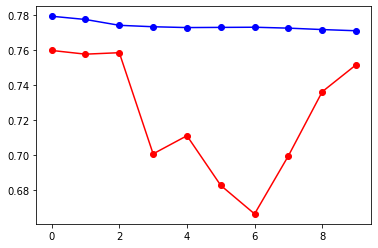

In [274]:
plt.plot(y_prediction_final, 'bo-')
plt.plot(test_list[0], 'ro-')